In [1]:
# load in libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
X = np.load('X.npy')
y = np.load('Y.npy')

In [4]:
#split test and train
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=8)

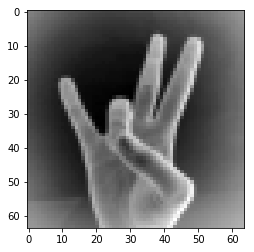

In [5]:
plt.imshow(Xtrain[0], cmap=plt.cm.binary)

In [6]:
Xtrain[0]

array([[0.5254902 , 0.5411765 , 0.5568628 , ..., 0.48235294, 0.47058824,
        0.45882353],
       [0.5372549 , 0.5529412 , 0.5686275 , ..., 0.49019608, 0.47843137,
        0.46666667],
       [0.5529412 , 0.5686275 , 0.5803922 , ..., 0.49803922, 0.4862745 ,
        0.47058824],
       ...,
       [0.47058824, 0.47843137, 0.4862745 , ..., 0.40392157, 0.4       ,
        0.39607844],
       [0.4627451 , 0.47058824, 0.47843137, ..., 0.4       , 0.39215687,
        0.3882353 ],
       [0.45882353, 0.46666667, 0.47058824, ..., 0.39215687, 0.38431373,
        0.38039216]], dtype=float32)

In [7]:
# Normalized the data
Xtrain=tf.keras.utils.normalize(Xtrain, axis=1)
Xtest=tf.keras.utils.normalize(Xtest, axis=1)

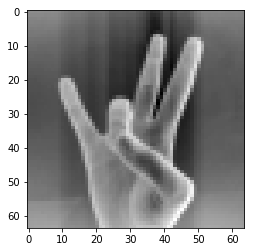

In [8]:
plt.imshow(Xtrain[0], cmap=plt.cm.binary)

In [9]:
Xtrain[0]

array([[0.10121904, 0.1017023 , 0.10225273, ..., 0.10739969, 0.10801522,
        0.1085733 ],
       [0.10348513, 0.10391322, 0.104413  , ..., 0.10914603, 0.10981548,
        0.11042925],
       [0.10650659, 0.10686111, 0.10657327, ..., 0.11089237, 0.11161573,
        0.11135723],
       ...,
       [0.09064391, 0.08991072, 0.08929111, ..., 0.08993633, 0.09181295,
        0.09372567],
       [0.08913317, 0.08843677, 0.08785094, ..., 0.08906316, 0.09001269,
        0.09186971],
       [0.08837781, 0.0876998 , 0.08641075, ..., 0.08731683, 0.08821244,
        0.09001376]], dtype=float32)

In [10]:
Xtrain.shape

(1649, 64, 64)

# Building the Model

In [17]:
model=tf.keras.models.Sequential() # we use Sequential model
# 1st layer is Input Layer 
# as our data is 28x28 we have to flatern that data
# we can flattern by using reshape, numpy or there is builtin layer in keras.
model.add(tf.keras.layers.Flatten(input_shape=(64, 64))) # Xtrain.shape (1649, 64, 64).
# 1 Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Dense(how many units in layer=(128) neuron in network,activation=relu (it is default function ))
# 2 Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # It is classification problem so we use 10 layers (0-9), it is probability distribution=softmax

model.compile(optimizer='adam',
             loss='categorical_crossentropy',#when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample).
             metrics=['accuracy'])
# adam is general optimizer.
# note : A neural network is not tries to maximized accuracy it tries to minimized the loss
model.fit(Xtrain, ytrain, epochs=30)
# If you just train on 1 epoch, then the neural network saw each unique sample once. 3 epochs means it passed over your data set 3 times.

Epoch 1/30
1649/1649 [==============================] - 1s 807us/step - loss: 2.3183 - acc: 0.1110
Epoch 2/30
1649/1649 [==============================] - 1s 639us/step - loss: 2.2891 - acc: 0.1249
Epoch 3/30
1649/1649 [==============================] - 1s 591us/step - loss: 2.2148 - acc: 0.1886
Epoch 4/30
1649/1649 [==============================] - 1s 417us/step - loss: 2.0964 - acc: 0.2680
Epoch 5/30
1649/1649 [==============================] - 1s 449us/step - loss: 1.9011 - acc: 0.3560
Epoch 6/30
1649/1649 [==============================] - 1s 451us/step - loss: 1.7309 - acc: 0.4069
Epoch 7/30
1649/1649 [==============================] - 1s 463us/step - loss: 1.5716 - acc: 0.4603
Epoch 8/30
1649/1649 [==============================] - 1s 460us/step - loss: 1.4875 - acc: 0.4973
Epoch 9/30
1649/1649 [==============================] - 1s 456us/step - loss: 1.3770 - acc: 0.5385
Epoch 10/30
1649/1649 [==============================] - 1s 456us/step - loss: 1.3074 - acc: 0.5482
Epoch 11/

In [18]:
val_loss, val_accuracy=model.evaluate(Xtest,ytest)
print(val_loss, val_accuracy)

413/413 [==============================] - 0s 1ms/step
0.8693683046405598 0.7433414036367476


# Saving Model

In [19]:
model.save('sign_reader.model')

In [20]:
new_model=tf.keras.models.load_model('sign_reader.model')

In [21]:
prediction=new_model.predict([Xtest]) # prediction always take a list

In [22]:
prediction

array([[5.5060886e-05, 9.6794999e-01, 1.2141425e-03, ..., 9.5805372e-06,
        4.2717988e-05, 1.0789676e-04],
       [1.2228049e-05, 1.9454287e-03, 5.5759639e-02, ..., 1.9613993e-03,
        3.7791319e-02, 1.5929237e-06],
       [8.1633262e-02, 1.9030771e-01, 2.4288414e-02, ..., 6.7320914e-05,
        3.3459641e-05, 5.0833779e-03],
       ...,
       [6.0578977e-04, 1.5473551e-01, 1.6754091e-01, ..., 6.6132769e-02,
        7.8118190e-02, 2.0390239e-03],
       [3.3220192e-04, 1.4770661e-01, 8.0261871e-02, ..., 1.1929486e-04,
        4.7968463e-03, 8.4196904e-04],
       [3.4355442e-04, 3.1786583e-02, 1.6733178e-01, ..., 5.0811325e-03,
        1.4409292e-01, 4.2838580e-03]], dtype=float32)

In [23]:
import numpy as np

In [24]:
prediction[0]

array([5.5060886e-05, 9.6794999e-01, 1.2141425e-03, 2.8845703e-03,
       1.2916494e-06, 3.4657500e-03, 2.4269089e-02, 9.5805372e-06,
       4.2717988e-05, 1.0789676e-04], dtype=float32)

In [36]:
print(np.argmax(prediction[5])) # Returns the indices of the maximum values along an axis.

7


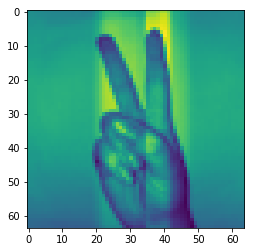

In [37]:
plt.imshow(Xtest[3])
plt.show()

In [40]:
import cv2

In [41]:
img_array=cv2.imread('1546764115012.jpg',cv2.IMREAD_GRAYSCALE)

In [44]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [45]:
Xtrain=tf.keras.utils.normalize(img_array, axis=1)

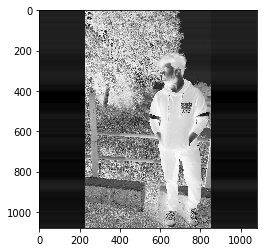

In [47]:
plt.imshow(Xtrain, cmap=plt.cm.binary)

In [49]:
prediction=new_model.predict([Xtrain])

ValueError: Error when checking input: expected flatten_7_input to have 3 dimensions, but got array with shape (1080, 1080)